
# DAMO600 — Prescriptive Analytics  
## Module 7 (Part 3): Statistical Aspects of Simulation

This notebook implements **Part 3** of Module 7 using your provided instructional content:

- Statistical aspects of simulation  
- Random number generation (PRNGs, reproducibility)  
- Common probability distributions used in simulation  
- Input modeling and distribution fitting  
- Output analysis & interpretation  
- Excel examples for random numbers  
- Python implementations for distributions and sampling



## 1) Statistical Aspects of Simulation

Simulation is deeply tied to **statistics**, since systems are modeled using **stochastic variables**.  
This enables us to:
- Represent uncertainty realistically.
- Explore system performance under many possible futures.
- Quantify risks and probabilities of rare events.

Core elements include:
- **Random number generation**
- **Probability distributions**
- **Input modeling & distribution fitting**
- **Output analysis & statistical interpretation**



## 2) Random Number Generation

Two main categories:
- **True random numbers**: Physical processes (radioactive decay, atmospheric noise). Rare in simulation.  
- **Pseudo-random number generators (PRNGs)**: Algorithmic, fast, reproducible, controlled by **seed**.

**Reproducibility**: Setting the seed ensures that random experiments are repeatable across runs.

Example: Python's `numpy.random` with a fixed seed.


In [2]:

import numpy as np

# Fixed seed for reproducibility
np.random.seed(42)
rand_nums = np.random.rand(5)  # 5 random numbers between 0 and 1

rand_nums


array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])


## 3) Prevalent Probability Distributions in Simulation

### Discrete Distributions
- **Binomial**: #successes in n trials (yes/no outcomes).  
- **Poisson**: #events in a fixed interval (rare events, arrivals).  
- **Geometric**: #trials until first success.

### Continuous Distributions
- **Uniform**: Equal likelihood within a range.  
- **Normal (Gaussian)**: Bell-shaped, mean μ, std σ.  
- **Exponential**: Time between Poisson arrivals.  
- **Lognormal**: Skewed, often for task durations.  
- **Gamma**: Waiting times for multiple Poisson events.


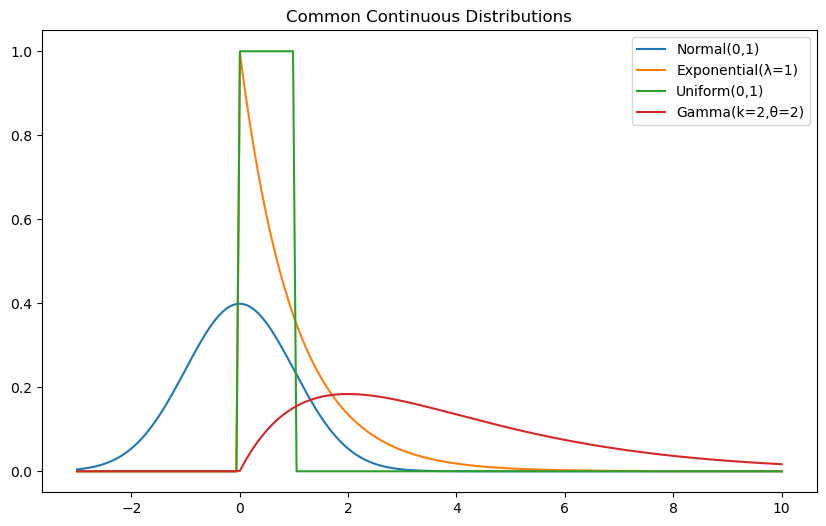

In [3]:

import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, uniform, norm, expon, lognorm, gamma

x = np.linspace(-3, 10, 200)

plt.figure(figsize=(10,6))
plt.plot(x, norm.pdf(x, loc=0, scale=1), label="Normal(0,1)")
plt.plot(x, expon.pdf(x, scale=1), label="Exponential(λ=1)")
plt.plot(x, uniform.pdf(x, loc=0, scale=1), label="Uniform(0,1)")
plt.plot(x, gamma.pdf(x, a=2, scale=2), label="Gamma(k=2,θ=2)")
plt.title("Common Continuous Distributions")
plt.legend()
plt.show()



## 4) Input Modeling & Distribution Fitting

**Input modeling**: Choosing the right distribution for system variables.  
Examples:
- Customer arrivals → Poisson/exponential.  
- Service times → Normal, lognormal, or gamma.  
- Machine breakdowns → Weibull.

**Distribution fitting**: Use data to choose distribution + parameters.  
- **Maximum likelihood estimation (MLE)**: Estimate parameters.  
- **Goodness-of-fit tests**: Chi-square, KS-test.  
- **Visual checks**: Histogram vs. fitted PDF.

Example: Fit an exponential distribution to synthetic inter-arrival times.


Fitted Exponential: loc=0.00, scale=1.96


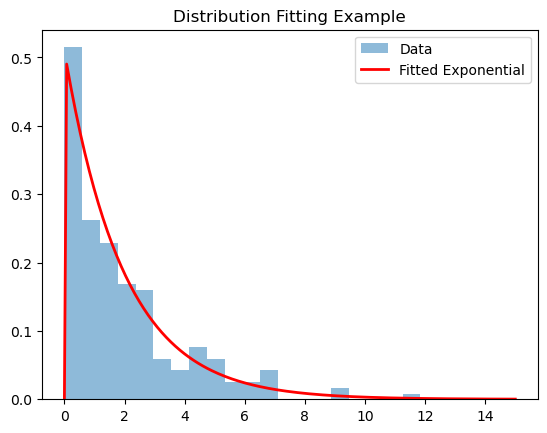

In [4]:

import scipy.stats as st

# Generate synthetic inter-arrival times (true exponential λ=0.5)
np.random.seed(1)
data = np.random.exponential(scale=2.0, size=200)

# Fit distribution
loc, scale = st.expon.fit(data)
print(f"Fitted Exponential: loc={loc:.2f}, scale={scale:.2f}")

# Plot histogram and fitted PDF
x = np.linspace(0, 15, 200)
plt.hist(data, bins=20, density=True, alpha=0.5, label="Data")
plt.plot(x, st.expon.pdf(x, loc, scale), "r-", lw=2, label="Fitted Exponential")
plt.legend()
plt.title("Distribution Fitting Example")
plt.show()



## 5) Output Analysis & Interpretation

After running simulations, we must interpret outputs statistically.

- **Point estimates**: Averages, proportions.  
- **Variability**: Variance, confidence intervals.  
- **Monte Carlo integration**: Estimate integrals with random samples.  
- **Visualization**: Histograms, time series, confidence bands.

Example: Use Monte Carlo to approximate π via random sampling.


In [5]:

# Monte Carlo approximation of pi
N = 100000
points = np.random.rand(N, 2)
inside = np.sum(points[:,0]**2 + points[:,1]**2 <= 1)
pi_est = 4 * inside / N

pi_est


np.float64(3.14108)